In [1]:
conda install nltk

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
conda install spacy==2.3.5


Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [11]:
!pip3 install en_core_web_sm
!python -m spacy download en

ERROR: Could not find a version that satisfies the requirement en_core_web_sm (from versions: none)
ERROR: No matching distribution found for en_core_web_sm
     |████████████████████████████████| 12.0 MB 8.3 MB/s eta 0:00:01
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.3.1-py3-none-any.whl size=12047105 sha256=73cdb384e9a1b73d20809f4bd82b594848204a40049c67c03c5fc7bda5b30266
  Stored in directory: /private/var/folders/sj/_wr5r7nx0v7g1jcs67lqc_sc0000gn/T/pip-ephem-wheel-cache-pqe0an4o/wheels/ee/4d/f7/563214122be1540b5f9197b52cb3ddb9c4a8070808b22d5a84
Successfully built en-core-web-sm
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/Users/sonalisengupta/miniforge3/envs/tf_ml/lib/python3.8/site-packages/en_core_web_sm
-->
/Users/sonalisengupta/miniforge3/envs/tf_ml/lib/python3.8/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [12]:
nlp=spacy.load('en')

In [15]:
!pip install contractions

     |████████████████████████████████| 284 kB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 321 kB 10.6 MB/s eta 0:00:01
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp38-cp38-macosx_11_0_arm64.whl size=32441 sha256=e62bec62e4e85b67b9e13cad481d7768347e429a20686eb000952c26efa621d2
  Stored in directory: /Users/sonalisengupta/Library/Caches/pip/wheels/74/bc/b8/e5f739a84005620cfe66d3fcb8bb182e309d6056bc6700b60e
Successfully built pyahocorasick


In [17]:
!pip install bs4

     |████████████████████████████████| 97 kB 3.8 MB/s eta 0:00:011
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1271 sha256=96e20aa467f7bbae3cf1e28a64beb0b191c181737b6ffd637a04a3231646db04
  Stored in directory: /Users/sonalisengupta/Library/Caches/pip/wheels/75/78/21/68b124549c9bdc94f822c02fb9aa3578a669843f9767776bca
Successfully built bs4


In [19]:
!pip install afinn

     |████████████████████████████████| 52 kB 1.7 MB/s eta 0:00:011
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53448 sha256=5fc90909f5892e7648794becf762450007bd5ae51c1eed88eea764300189a0f4
  Stored in directory: /Users/sonalisengupta/Library/Caches/pip/wheels/f6/6f/c3/b305c5107a17618f2938a067d5ffcbb556909d82398762089e
Successfully built afinn


In [1]:
# Usual data representation and manipulation libraries
import pandas as pd
import numpy as np
from collections import Counter
# NLTK is very useful for natural language applications
import nltk
# This will be used to tokenize sentences
from nltk.tokenize.toktok import ToktokTokenizer
# We use spacy for extracting useful information from English words
import spacy
#nlp = spacy.load("en_core_web_sm")
nlp=spacy.load('en')
#nlp = spacy.load('en', parse = False, tag=False, entity=False)
# This dictionary will be used to expand contractions (e.g. we'll -> we will)
from contractions import contractions_dict
import re
# Unicodedata will be used to remove accented characters
import unicodedata
# BeautifulSoup will be used to remove html tags
from bs4 import BeautifulSoup

# Lexicon models
from afinn import Afinn
from nltk.corpus import sentiwordnet as swn
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Evaluation libraries
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [4]:
posi_sent = pd.read_csv("/Users/sonalisengupta/Downloads/positive(1).csv")
neg_sent = pd.read_csv("/Users/sonalisengupta/Downloads/negative(1).csv")

In [5]:
posi_sent

,Review,Label
0,Better than Wolff's Kasha. I grew up eating Ka...,1
1,It was such good product. Came in two differen...,1
2,MMMM Yes all chocolate is good.<br />But some ...,1
3,"This is, as all of their cereals I've ordered ...",1
4,Whoever Photoshopped the cookie on the front o...,1
...,...,...
24995,"Healthy alternative, high in protein, especial...",1
24996,I have tried a half a dozen unsweetened drinks...,1
24997,Is a little bit more costly then other dog foo...,1
24998,My husband is from Hungary and craves foods th...,1


In [6]:
neg_sent

,Review,Label
0,We love Malibu Rum but they sure missed the ma...,0
1,I just wanted to say that if you want to get y...,0
2,These seeds were accompanied by small broken p...,0
3,Way way way overpriced. I can get this same se...,0
4,I bought these on the strength of the reviews....,0
...,...,...
24995,"With so many other glowing reviews, I feel a l...",0
24996,Giving it 3 stars because for an 'All Purpose'...,0
24997,"more affordable than other bully sticks, but m...",0
24998,I got this for my daughter because she love bl...,0


In [7]:
df=pd.concat([posi_sent,neg_sent],axis=0,ignore_index=True)

In [8]:
df

,Review,Label
0,Better than Wolff's Kasha. I grew up eating Ka...,1
1,It was such good product. Came in two differen...,1
2,MMMM Yes all chocolate is good.<br />But some ...,1
3,"This is, as all of their cereals I've ordered ...",1
4,Whoever Photoshopped the cookie on the front o...,1
...,...,...
49995,"With so many other glowing reviews, I feel a l...",0
49996,Giving it 3 stars because for an 'All Purpose'...,0
49997,"more affordable than other bully sticks, but m...",0
49998,I got this for my daughter because she love bl...,0


In [9]:
df.Review[13]

'Our dog loved the <a href="http://www.amazon.com/gp/product/B006Q7YFLQ">Nature\'s Variety Instinct Raw Boost Bites Freeze-Dried Treats, Chicken, 4-Ounce Package</a>, and I would highly recommend it to anyone who is working on training their dog. The ingredients are healthy, and apparently it is quite tasty.<br /><br />I gave it four stars, because the treats are a little larger than I would like. Of course, you can just break them in pieces to make great rewards. They crumble a bit, but those crumbs still work! Our dog still hasn\'t got all of the commands down, but at least she looked forward to the training.'

In [10]:
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text


In [11]:
x = strip_html_tags(df.Review[13])
x

"Our dog loved the Nature's Variety Instinct Raw Boost Bites Freeze-Dried Treats, Chicken, 4-Ounce Package, and I would highly recommend it to anyone who is working on training their dog. The ingredients are healthy, and apparently it is quite tasty.I gave it four stars, because the treats are a little larger than I would like. Of course, you can just break them in pieces to make great rewards. They crumble a bit, but those crumbs still work! Our dog still hasn't got all of the commands down, but at least she looked forward to the training."

In [12]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

def remove_special_characters(text):
    text = re.sub('[^a-zA-z0-9\s]', '', text)
    return text

In [13]:
z = remove_accented_chars(x)
z

"Our dog loved the Nature's Variety Instinct Raw Boost Bites Freeze-Dried Treats, Chicken, 4-Ounce Package, and I would highly recommend it to anyone who is working on training their dog. The ingredients are healthy, and apparently it is quite tasty.I gave it four stars, because the treats are a little larger than I would like. Of course, you can just break them in pieces to make great rewards. They crumble a bit, but those crumbs still work! Our dog still hasn't got all of the commands down, but at least she looked forward to the training."

In [14]:
def expand_contractions(text, contraction_mapping=contractions_dict):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match) if contraction_mapping.get(match) else contraction_mapping.get(match.lower())                               
        return first_char+expanded_contraction[1:] if expanded_contraction != None else match
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

In [15]:
e = expand_contractions(z)
e

'Our dog loved the Natures Variety Instinct Raw Boost Bites Freeze-Dried Treats, Chicken, 4-Ounce Package, and I would highly recommend it to anyone who is working on training their dog. The ingredients are healthy, and apparently it is quite tasty.I gave it four stars, because the treats are a little larger than I would like. Of course, you can just break thehem in pieces to make great rewards. They crumble a bit, but those crumbs still work! Our dog still has not got all of the commands down, but at least she looked forward to the training.'

In [16]:
def lemmatize_text(text):
    text = nlp(text)
    return ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])

In [17]:
f = lemmatize_text(e)
f

'Our dog love the Natures Variety Instinct Raw boost bite freeze - dry Treats , Chicken , 4-ounce package , and I would highly recommend it to anyone who be work on train their dog . the ingredient be healthy , and apparently it be quite tasty . I give it four star , because the treat be a little large than I would like . of course , you can just break thehem in piece to make great reward . They crumble a bit , but those crumb still work ! Our dog still have not get all of the command down , but at least she look forward to the training .'

In [18]:
!python -m nltk.downloader stopwords

/Users/sonalisengupta/miniforge3/envs/tf_ml/lib/python3.8/runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sonalisengupta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
#nltk.download('stopwords')
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

def remove_stopwords(text, is_lower_case=False):
    tokenizer = ToktokTokenizer()
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [20]:
g = remove_stopwords(f)
g

'dog love Natures Variety Instinct Raw boost bite freeze - dry Treats , Chicken , 4-ounce package , would highly recommend anyone work train dog . ingredient healthy , apparently quite tasty . give four star , treat little large would like . course , break thehem piece make great reward . crumble bit , crumb still work ! dog still not get command , least look forward training .'

In [21]:
def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # expand contractions    
        if contraction_expansion:
            doc = expand_contractions(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # insert spaces between special characters to isolate them    
        special_char_pattern = re.compile(r'([{.(-)!}])')
        doc = special_char_pattern.sub(" \\1 ", doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters    
        if special_char_removal:
            doc = remove_special_characters(doc)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
    return normalized_corpus

In [22]:
df['Review'] = normalize_corpus(df.Review)
df.to_csv("normalized_df.csv", index = False)

In [23]:
df_Review = pd.read_csv("/Users/sonalisengupta/Downloads/normalized_df.csv")
df_Review 

,Review,Label
0,well wolffs kasha grow eat kasha easy prepare ...,1
1,good product come two different box describe c...,1
2,mmmm yes chocolate good chocolate well well ch...,1
3,cereal order far fresh high quality wonderful ...,1
4,whoever photoshoppe cookie front package true ...,1
...,...,...
49995,many glowing review feel little ashamed put lu...,0
49996,give 3 star purpose bake mix really good panca...,0
49997,affordable bully stick office fill incredible ...,0
49998,get daughter love blood hot chocolate get stuf...,0


In [20]:
sap= df_Review.shape

print(f"No. of Datapoints : {sap[0]}")
print(f"No. of Features : {sap[1]}")

No. of Datapoints : 50000
No. of Features : 2


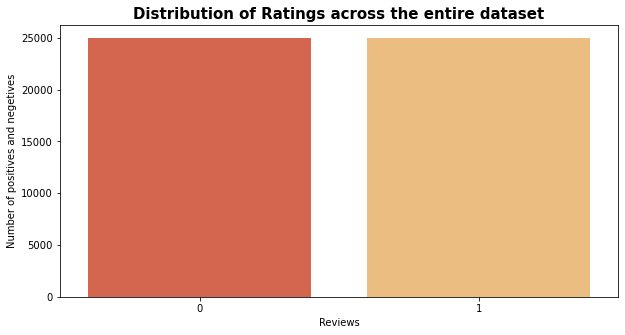

0    25000
1    25000
Name: Label, dtype: int64


In [22]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(10,5))
sns.countplot(df_Review['Label'], palette=sns.color_palette("RdYlGn", 5))
plt.title("Distribution of Ratings across the entire dataset", fontweight='bold', fontsize=15)
plt.xlabel("Reviews")
plt.ylabel("Number of positives and negetives")
plt.show();

print(df_Review['Label'].value_counts().sort_index());

In [24]:
!pip install WordCloud

     |████████████████████████████████| 220 kB 3.5 MB/s eta 0:00:01
  Created wheel for WordCloud: filename=wordcloud-1.8.1-cp38-cp38-macosx_11_0_arm64.whl size=153026 sha256=03009295e9f2a6b07fa440c5f77f14a722fda9bd3c66ddc884d72f2dcdcfd442
  Stored in directory: /Users/sonalisengupta/Library/Caches/pip/wheels/4d/3f/0d/a2ba9b7895c9f1be89018b3141c3df3d4f9c786c882ccfbc3b
Successfully built WordCloud


In [42]:
df11=df_Review[df_Review.Label==1]

There are 6263630 words in the combination of positive review.


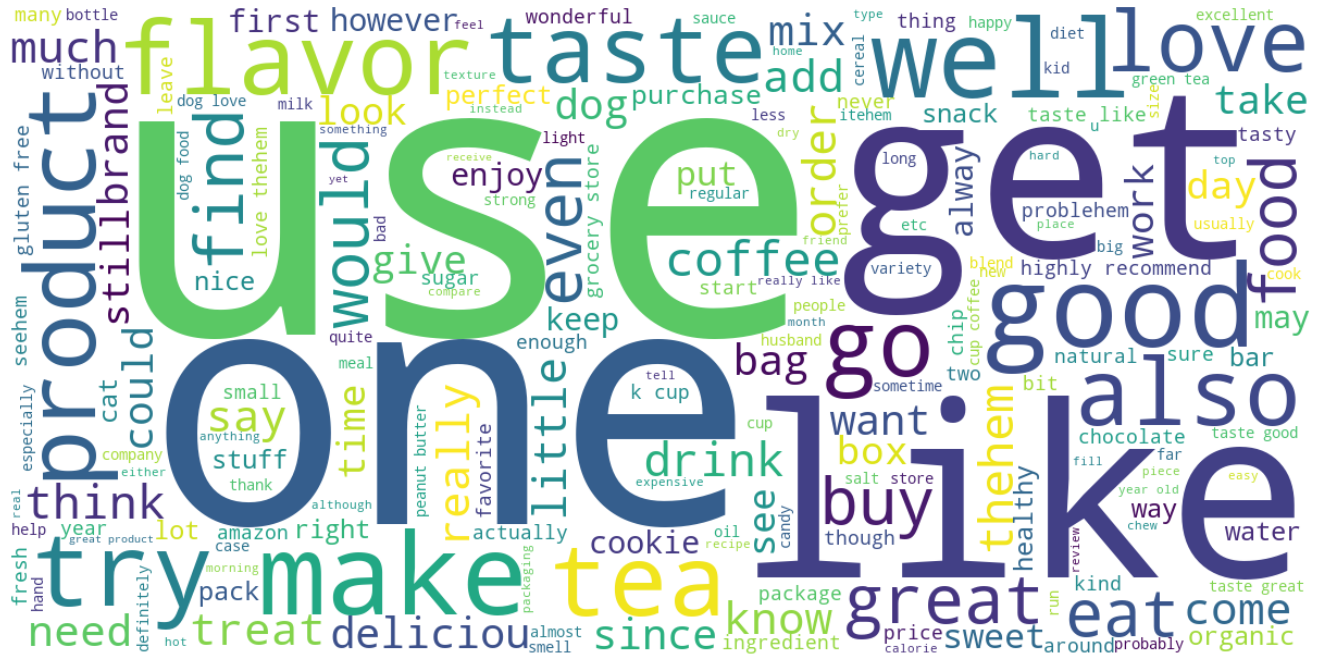

CPU times: user 3.6 s, sys: 270 ms, total: 3.87 s
Wall time: 3.69 s


In [49]:
%%time
from nltk.corpus import stopwords
from wordcloud import WordCloud

text = " ".join(review for review in df11["Review"])
print ("There are {} words in the combination of positive review.".format(len(text)))

# Create stopword list:
default_stopwords=set(stopwords.words('english'))

# Generate a word cloud image
wordcloud = WordCloud(stopwords=default_stopwords, background_color="white", width=1200, height=600).generate(text)

# Display the generated image:
plt.figure(figsize=(30,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [43]:
df00=df_Review[df_Review.Label==0]

There are 7340818 words in the combination of negetive review.


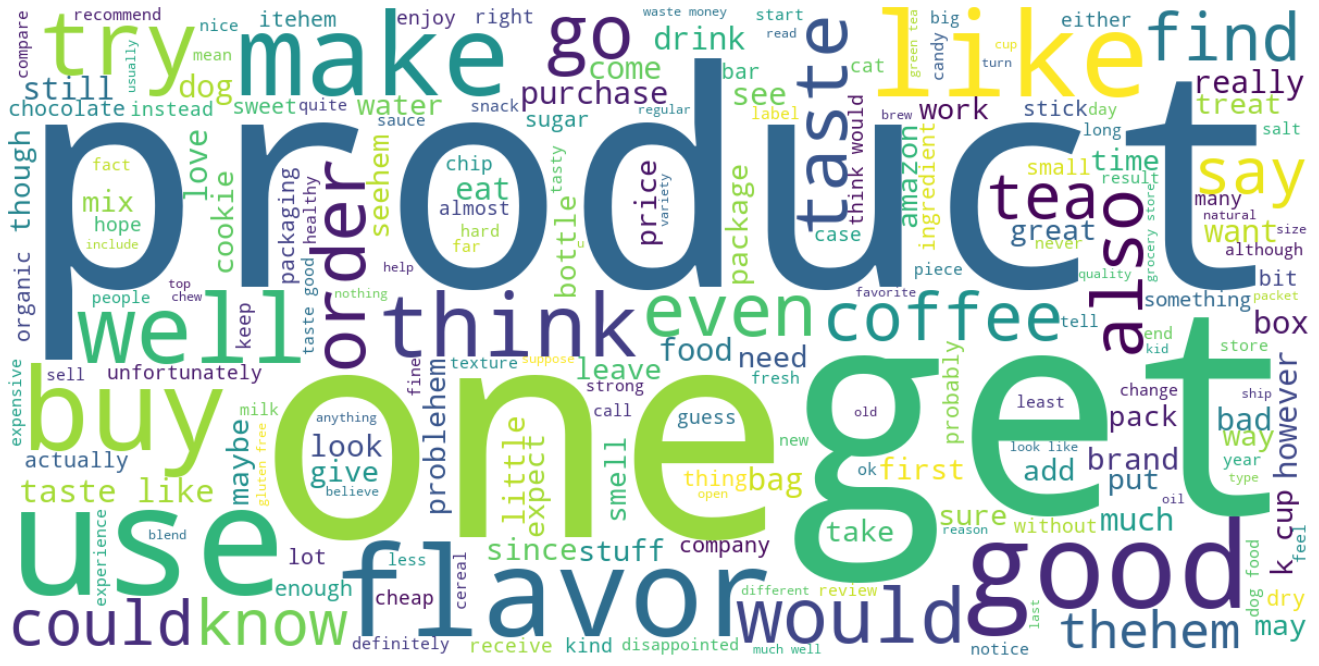

CPU times: user 3.86 s, sys: 260 ms, total: 4.12 s
Wall time: 3.91 s


In [48]:
%%time
from nltk.corpus import stopwords
from wordcloud import WordCloud

text = " ".join(review for review in df00["Review"])
print ("There are {} words in the combination of negetive review.".format(len(text)))

# Create stopword list:
default_stopwords=set(stopwords.words('english'))

# Generate a word cloud image
wordcloud = WordCloud(stopwords=default_stopwords, background_color="white", width=1200, height=600).generate(text)

# Display the generated image:
plt.figure(figsize=(30,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [44]:
df00

,Review,Label
25000,love malibu rum sure miss mark rum punch even ...,0
25001,want say want get dog healthy snack alternativ...,0
25002,seed accompany small broken piece seed make ba...,0
25003,way way way overprice get set japanese market ...,0
25004,buy strength review inside thin wrapper textur...,0
...,...,...
49995,many glowing review feel little ashamed put lu...,0
49996,give 3 star purpose bake mix really good panca...,0
49997,affordable bully stick office fill incredible ...,0
49998,get daughter love blood hot chocolate get stuf...,0


In [43]:
df_Review

,Review,Label
0,well wolffs kasha grow eat kasha easy prepare ...,1
1,good product come two different box describe c...,1
2,mmmm yes chocolate good chocolate well well ch...,1
3,cereal order far fresh high quality wonderful ...,1
4,whoever photoshoppe cookie front package true ...,1
...,...,...
49995,many glowing review feel little ashamed put lu...,0
49996,give 3 star purpose bake mix really good panca...,0
49997,affordable bully stick office fill incredible ...,0
49998,get daughter love blood hot chocolate get stuf...,0


In [24]:
reviews = np.array(df_Review['Review'])
sentiments = np.array(df_Review['Label'])

In [25]:
# creating index mapping dictionary
from collections import Counter
all_text2 = ' '.join(reviews)
# create a list of words
words = all_text2.split()
# Count all the words using Counter Method
count_words = Counter(words)

total_words = len(words)
sorted_words = count_words.most_common(total_words)


In [46]:
print(count_words)

Counter({'not': 68899, 'like': 26673, 'taste': 24698, 'good': 22325, 'flavor': 19196, 'product': 18573, 'thehem': 18027, 'one': 17507, 'get': 17474, 'would': 17231, 'coffee': 16270, 'try': 15432, 'make': 15411, 'buy': 15199, 'use': 14951, 'love': 13597, 'food': 13386, 'well': 13180, 'tea': 13168, 'great': 11878, 'eat': 11135, 'find': 10878, 'no': 10393, 'go': 10029, 'dog': 9523, 'really': 9152, 'time': 9100, 'order': 8975, 'think': 8845, 'much': 8841, 'amazon': 8248, 'bag': 8225, 'cup': 8140, 'give': 8115, 'even': 7455, 'price': 7401, 'also': 7296, 'say': 7186, 'little': 7151, 'drink': 7148, 'box': 6937, 'water': 6206, 'look': 6096, 'first': 6061, 'cat': 6054, 'want': 5852, 'know': 5802, 'store': 5774, 'day': 5769, 'could': 5727, 'come': 5713, 'chocolate': 5662, 'add': 5549, 'treat': 5515, 'take': 5452, 'sugar': 5405, 'purchase': 5365, 'brand': 5356, 'bad': 5160, 'way': 5006, '2': 4841, 'sweet': 4835, 'two': 4752, 'year': 4751, 'ingredient': 4600, 'thing': 4597, 'recommend': 4575, 'mix

In [47]:
reviews

array(['well wolffs kasha grow eat kasha easy prepare healthy meal bobs red mill great selection thing grain ever portland area check store restaurant great vegetarian selection well meat eater stuff',
       'good product come two different box describe cover plastic wrap together',
       'mmmm yes chocolate good chocolate well well chocolateit smooth easy creamy taste not overly sweet imo pretty much perfect',
       ...,
       'affordable bully stick office fill incredible stench dog chew one bully stick first one wonder whether co worker ok smell',
       'get daughter love blood hot chocolate get stuff hoirrible taste bad',
       'not enough flavor murky brown color lack aroma enjoy variety line prefer different brand rose hip tea would drink regular black tea though'],
      dtype=object)

In [48]:
vocab_to_int = {w:i for i, (w,c) in enumerate(sorted_words)}

In [49]:
vocab_to_int

{'not': 0,
 'like': 1,
 'taste': 2,
 'good': 3,
 'flavor': 4,
 'product': 5,
 'thehem': 6,
 'one': 7,
 'get': 8,
 'would': 9,
 'coffee': 10,
 'try': 11,
 'make': 12,
 'buy': 13,
 'use': 14,
 'love': 15,
 'food': 16,
 'well': 17,
 'tea': 18,
 'great': 19,
 'eat': 20,
 'find': 21,
 'no': 22,
 'go': 23,
 'dog': 24,
 'really': 25,
 'time': 26,
 'order': 27,
 'think': 28,
 'much': 29,
 'amazon': 30,
 'bag': 31,
 'cup': 32,
 'give': 33,
 'even': 34,
 'price': 35,
 'also': 36,
 'say': 37,
 'little': 38,
 'drink': 39,
 'box': 40,
 'water': 41,
 'look': 42,
 'first': 43,
 'cat': 44,
 'want': 45,
 'know': 46,
 'store': 47,
 'day': 48,
 'could': 49,
 'come': 50,
 'chocolate': 51,
 'add': 52,
 'treat': 53,
 'take': 54,
 'sugar': 55,
 'purchase': 56,
 'brand': 57,
 'bad': 58,
 'way': 59,
 '2': 60,
 'sweet': 61,
 'two': 62,
 'year': 63,
 'ingredient': 64,
 'thing': 65,
 'recommend': 66,
 'mix': 67,
 'see': 68,
 'work': 69,
 'may': 70,
 'still': 71,
 'review': 72,
 'pack': 73,
 'package': 74,
 'small

In [57]:
#encoding reviews
reviews_int = []
for review in reviews:
    r = [vocab_to_int[w] for w in review.split()]
    reviews_int.append(r)
print (reviews_int[0:3])

[[17, 21122, 16086, 424, 20, 16086, 137, 727, 100, 249, 1954, 366, 1154, 19, 1352, 65, 330, 133, 7287, 715, 401, 47, 850, 19, 1223, 1352, 17, 274, 928, 94], [3, 5, 50, 62, 103, 40, 660, 647, 292, 617, 606], [4801, 486, 51, 3, 51, 17, 17, 21123, 333, 137, 655, 2, 0, 877, 61, 2773, 149, 29, 189]]


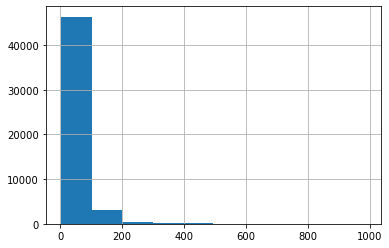

count    50000.000000
mean        44.055100
std         44.579835
min          3.000000
25%         18.000000
50%         31.000000
75%         54.000000
max        986.000000
dtype: float64

In [58]:
#Analysing reviews
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
reviews_len = [len(x) for x in reviews_int]
pd.Series(reviews_len).hist()
plt.show()
pd.Series(reviews_len).describe()

In [59]:
def pad_features(reviews_int, seq_length):
    ''' Return features of review_ints, where each review is padded with 0's or truncated to the input seq_length.
    '''
    features = np.zeros((len(reviews_int), seq_length), dtype = int)
    
    for i, review in enumerate(reviews_int):
        review_len = len(review)
        
        if review_len <= seq_length:
            zeroes = list(np.zeros(seq_length-review_len))
            new = zeroes+review
        elif review_len > seq_length:
            new = review[0:seq_length]
        
        features[i,:] = np.array(new)
    
    return features

In [60]:
features=pad_features(reviews_int, 100)

In [61]:
#splitting x and y

split_frac = 0.7
len_feat=50000
train_x = features[0:int(split_frac*len_feat)]
train_y = sentiments[0:int(split_frac*len_feat)]
test_x = features[int(split_frac*len_feat):]
test_y = sentiments[int(split_frac*len_feat):]


In [62]:
train_x.shape

(35000, 100)

In [63]:
import torch
from torch.utils.data import DataLoader, TensorDataset

In [64]:
# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
#valid_data = TensorDataset(torch.from_numpy(valid_x), torch.from_numpy(valid_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))
# dataloaders
batch_size = 50
# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

In [65]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()
print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([50, 100])
Sample input: 
 tensor([[    0,     0,     0,  ...,    11,     0,   282],
        [    0,     0,     0,  ...,    61,     2,     3],
        [ 2123, 18357, 18358,  ...,  8648,   769,    19],
        ...,
        [    0,     0,     0,  ...,   338,    46,     8],
        [    0,     0,     0,  ...,   150,   281,    50],
        [    0,     0,     0,  ...,   277,  1897,  4483]])

Sample label size:  torch.Size([50])
Sample label: 
 tensor([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 1])


In [66]:
#model definition
import torch.nn as nn

class SentimentLSTM(nn.Module):
    

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super().__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                            dropout=drop_prob, batch_first=True)
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()
        

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)

        # embeddings and lstm_out
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
    
        # stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
    
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden
        

In [67]:
#model initialization for LSTM

# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding
output_size = 1
embedding_dim = 400
hidden_dim = 256
n_layers = 2
net = SentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
print(net)


SentimentLSTM(
  (embedding): Embedding(39918, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [68]:
# loss and optimization functions
lr=0.001
train_on_gpu=0
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)


# training params

epochs = 4 # 3-4 is approx where I noticed the validation loss stop decreasing

counter = 0
print_every = 100
clip=5 # gradient clipping

# move model to GPU, if available
if(train_on_gpu):
    net.cuda()

net.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1

        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        inputs = inputs.type(torch.LongTensor)
        output, h = net(inputs, h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])

                if(train_on_gpu):
                    inputs, labels = inputs.cuda(), labels.cuda()

                inputs = inputs.type(torch.LongTensor)
                output, val_h = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())

            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))

Epoch: 1/4... Step: 100... Loss: 0.453747... Val Loss: 0.746284
Epoch: 1/4... Step: 200... Loss: 0.506544... Val Loss: 0.811673
Epoch: 1/4... Step: 300... Loss: 0.262309... Val Loss: 0.867465
Epoch: 1/4... Step: 400... Loss: 0.199677... Val Loss: 0.697420
Epoch: 1/4... Step: 500... Loss: 0.308257... Val Loss: 0.632500
Epoch: 1/4... Step: 600... Loss: 0.530231... Val Loss: 0.819071
Epoch: 1/4... Step: 700... Loss: 0.332571... Val Loss: 0.527629
Epoch: 2/4... Step: 800... Loss: 0.332316... Val Loss: 0.709605
Epoch: 2/4... Step: 900... Loss: 0.352084... Val Loss: 0.554729
Epoch: 2/4... Step: 1000... Loss: 0.323114... Val Loss: 0.693331
Epoch: 2/4... Step: 1100... Loss: 0.214814... Val Loss: 0.675149
Epoch: 2/4... Step: 1200... Loss: 0.357400... Val Loss: 0.542234
Epoch: 2/4... Step: 1300... Loss: 0.253478... Val Loss: 0.665814
Epoch: 2/4... Step: 1400... Loss: 0.259446... Val Loss: 0.746202
Epoch: 3/4... Step: 1500... Loss: 0.156752... Val Loss: 0.560520
Epoch: 3/4... Step: 1600... Loss: 

In [69]:
# Get test data loss and accuracy

test_losses = [] # track loss
num_correct = 0

# init hidden state
h = net.init_hidden(batch_size)

net.eval()
# iterate over test data
for inputs, labels in test_loader:

    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    h = tuple([each.data for each in h])

    if(train_on_gpu):
        inputs, labels = inputs.cuda(), labels.cuda()
    
    # get predicted outputs
    inputs = inputs.type(torch.LongTensor)
    output, h = net(inputs, h)
    
    # calculate loss
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer
    
    # compare predictions to true label
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)


# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))

Test loss: 0.675
Test accuracy: 0.769


In [76]:
pred.shape

torch.Size([50])

# logistic regression 
        

In [26]:
# Usual data representation and manipulation libraries
import pandas as pd
import numpy as np

# ML Models
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.model_selection import train_test_split

# Evaluation libraries
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Libraries for feature engineering
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [27]:
# extract data for model evaluation
train_reviews, test_reviews, train_sentiments, test_sentiments = train_test_split(reviews, sentiments, test_size=0.3)

# build BOW features on train reviews
cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1,2))
cv_train_features = cv.fit_transform(train_reviews)

# build TFIDF features on train reviews
tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0, ngram_range=(1,2),sublinear_tf=True)
tv_train_features = tv.fit_transform(train_reviews)

In [28]:
# transform test reviews into features
cv_test_features = cv.transform(test_reviews)
tv_test_features = tv.transform(test_reviews)

In [29]:
print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)
print('TFIDF model:> Train features shape:', tv_train_features.shape, ' Test features shape:', tv_test_features.shape)

BOW model:> Train features shape: (35000, 625596)  Test features shape: (15000, 625596)
TFIDF model:> Train features shape: (35000, 625596)  Test features shape: (15000, 625596)


In [30]:
# We define our SVM and LR models
lr = LogisticRegression(penalty='l2', max_iter=1000, C=1)
svm = SGDClassifier(loss='hinge', max_iter=100)

In [31]:
# Logistic Regression model on BOW features
lr.fit(cv_train_features,train_sentiments)
y_predicted = lr.predict(cv_test_features)

print("The model accuracy score is: {}".format(accuracy_score(test_sentiments, y_predicted)))
print("The model precision score is: {}".format(precision_score(test_sentiments, y_predicted, average="weighted")))
print("The model recall score is: {}".format(recall_score(test_sentiments, y_predicted, average="weighted")))
print("The model F1-score is: {}".format(f1_score(test_sentiments, y_predicted, average="weighted")))

print(classification_report(test_sentiments, y_predicted))

display(pd.DataFrame(confusion_matrix(test_sentiments, y_predicted), columns=["Pred. negative", "Pred. positive"], index=["Act. negative", "Act. positive"]))

The model accuracy score is: 0.8803333333333333
The model precision score is: 0.8803405004180003
The model recall score is: 0.8803333333333333
The model F1-score is: 0.8803336263841739
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7524
           1       0.88      0.88      0.88      7476

    accuracy                           0.88     15000
   macro avg       0.88      0.88      0.88     15000
weighted avg       0.88      0.88      0.88     15000



,Pred. negative,Pred. positive
Act. negative,6612,912
Act. positive,883,6593


Text(23.999999999999996, 0.5, 'Actual')

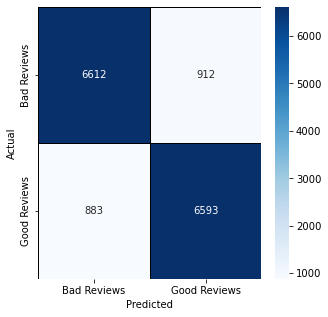

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(test_sentiments, y_predicted)
plt.figure(figsize = (5,5))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = ['Bad Reviews','Good Reviews'], 
            yticklabels = ['Bad Reviews','Good Reviews'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [33]:
# Logistic Regression model on TF-IDF features
lr.fit(tv_train_features,train_sentiments)
y_predicted = lr.predict(tv_test_features)

print("The model accuracy score is: {}".format(accuracy_score(test_sentiments, y_predicted)))
print("The model precision score is: {}".format(precision_score(test_sentiments, y_predicted, average="weighted")))
print("The model recall score is: {}".format(recall_score(test_sentiments, y_predicted, average="weighted")))
print("The model F1-score is: {}".format(f1_score(test_sentiments, y_predicted, average="weighted")))

print(classification_report(test_sentiments, y_predicted))

display(pd.DataFrame(confusion_matrix(test_sentiments, y_predicted), columns=["Pred. negative", "Pred. positive"], index=["Act. negative", "Act. positive"]))

The model accuracy score is: 0.8678
The model precision score is: 0.8678255766826757
The model recall score is: 0.8678
The model F1-score is: 0.867795472618335
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      7524
           1       0.87      0.86      0.87      7476

    accuracy                           0.87     15000
   macro avg       0.87      0.87      0.87     15000
weighted avg       0.87      0.87      0.87     15000



,Pred. negative,Pred. positive
Act. negative,6566,958
Act. positive,1025,6451


Text(23.999999999999996, 0.5, 'Actual')

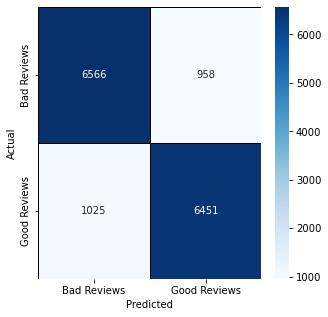

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(test_sentiments, y_predicted)
plt.figure(figsize = (5,5))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = ['Bad Reviews','Good Reviews'], 
            yticklabels = ['Bad Reviews','Good Reviews'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Support vector machine 


In [36]:
# SVM model on BOW
svm.fit(cv_train_features,train_sentiments)
y_predicted = svm.predict(cv_test_features)

print("The model accuracy score is: {}".format(accuracy_score(test_sentiments, y_predicted)))
print("The model precision score is: {}".format(precision_score(test_sentiments, y_predicted, average="weighted")))
print("The model recall score is: {}".format(recall_score(test_sentiments, y_predicted, average="weighted")))
print("The model F1-score is: {}".format(f1_score(test_sentiments, y_predicted, average="weighted")))

print(classification_report(test_sentiments, y_predicted))

display(pd.DataFrame(confusion_matrix(test_sentiments, y_predicted), columns=["Pred. negative", "Pred. positive"], index=["Act. negative", "Act. positive"]))

The model accuracy score is: 0.8720666666666667
The model precision score is: 0.8720705237665396
The model recall score is: 0.8720666666666667
The model F1-score is: 0.8720671960320194
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      7534
           1       0.87      0.87      0.87      7466

    accuracy                           0.87     15000
   macro avg       0.87      0.87      0.87     15000
weighted avg       0.87      0.87      0.87     15000



,Pred. negative,Pred. positive
Act. negative,6565,969
Act. positive,950,6516


Text(23.999999999999996, 0.5, 'Actual')

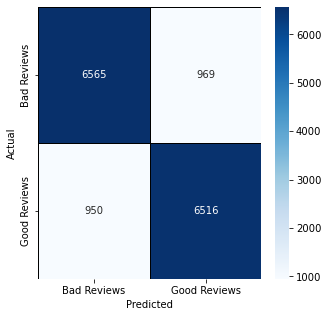

In [37]:
cm = confusion_matrix(test_sentiments, y_predicted)
plt.figure(figsize = (5,5))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = ['Bad Reviews','Good Reviews'], 
            yticklabels = ['Bad Reviews','Good Reviews'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [38]:
#SVM model on TF-IDF
svm.fit(tv_train_features,train_sentiments)
y_predicted = svm.predict(tv_test_features)

print("The model accuracy score is: {}".format(accuracy_score(test_sentiments, y_predicted)))
print("The model precision score is: {}".format(precision_score(test_sentiments, y_predicted, average="weighted")))
print("The model recall score is: {}".format(recall_score(test_sentiments, y_predicted, average="weighted")))
print("The model F1-score is: {}".format(f1_score(test_sentiments, y_predicted, average="weighted")))

print(classification_report(test_sentiments, y_predicted))

display(pd.DataFrame(confusion_matrix(test_sentiments, y_predicted), columns=["Pred. negative", "Pred. positive"], index=["Act. negative", "Act. positive"]))

The model accuracy score is: 0.8618666666666667
The model precision score is: 0.8619435770752745
The model recall score is: 0.8618666666666667
The model F1-score is: 0.8618535610596885
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      7534
           1       0.87      0.85      0.86      7466

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000



,Pred. negative,Pred. positive
Act. negative,6556,978
Act. positive,1094,6372


Text(23.999999999999996, 0.5, 'Actual')

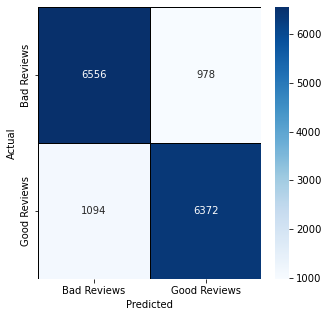

In [39]:
cm = confusion_matrix(test_sentiments, y_predicted)
plt.figure(figsize = (5,5))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = ['Bad Reviews','Good Reviews'], 
            yticklabels = ['Bad Reviews','Good Reviews'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [35]:
tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0, ngram_range=(1,2),sublinear_tf=True)
tv_train_features = tv.fit_transform(train_reviews)
tv

TfidfVectorizer(min_df=0.0, ngram_range=(1, 2), sublinear_tf=True)

In [36]:
tfidf_vect = TfidfVectorizer(max_features=15)

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
lr = LogisticRegression(solver='liblinear')
clf_pipeline = Pipeline(steps=[('tfidf', TfidfVectorizer(lowercase=True,
                                                      max_features=1000,
                                                      stop_words= ENGLISH_STOP_WORDS)),
                            ('model', LogisticRegression())])

pipeline_model = clf_pipeline.fit(train_reviews,train_sentiments)

In [45]:
y_pred = pipeline_model.predict(test_reviews)

In [46]:
Accuracy_score = accuracy_score(test_sentiments, y_pred)

Accuracy_score

0.8224666666666667

In [41]:
pipeline=pipeline_model
text = ["Virat Kohli, AB de Villiers set to auction their 'Green Day' kits from 2016 IPL match to raise funds"]

# predict the label using the pipeline
pipeline.predict(text)

array([1])

In [42]:
from joblib import dump

# dump the pipeline model
dump(pipeline, filename="text_classification.joblib")

['text_classification.joblib']

In [43]:
from joblib import load

# sample tweet text
text = ["Virat Kohli, AB de Villiers set to auction their 'Green Day' kits from 2016 IPL match to raise funds"]

# load the saved pipleine model
pipeline = load("text_classification.joblib")

# predict on the sample tweet text
pipeline.predict(text)

array([1])

In [38]:
#conda install flask

In [1]:
from flask import Flask, render_template, request, redirect, url_for
from joblib import load
#from get_tweets import get_related_tweets

# load the pipeline object
pipeline = load("text_classification.joblib")

# function to get results for a particular text query
def requestResults(name):
    # get the tweets text
    tweets = "this is a bad prog"
    # get the prediction
    tweets['prediction'] = pipeline.predict(tweets['tweet_text'])
    # get the value counts of different labels predicted
    data = str(tweets.prediction.value_counts()) + '\n\n'
    return data + str(tweets)

In [2]:
# start flask
app = Flask(__name__)

# render default webpage
@app.route('/')
def home():
    return render_template('/Users/sonalisengupta/Downloads/Hate-Speech-Classification-deployed-using-Flask-master/templates/home.html')

# when the post method detect, then redirect to success function
@app.route('/', methods=['POST', 'GET'])
def get_data():
    if request.method == 'POST':
        user = request.form['search']
        return redirect(url_for('success', name=user))

# get the data for the requested query
@app.route('/success/<name>')
def success(name):
    return "<xmp>" + str(requestResults(name)) + " </xmp> "


In [ ]:
if __name__=="__main__":
    app.run(host='192.168.1.255')
    #app.run(host=os.getenv('IP', '0.0.0.0'), port=int(os.getenv('PORT', 4444)))

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://192.168.1.255:5000/ (Press CTRL+C to quit)
